In [67]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /home/jay/.conda/envs/tensorflow/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4fwjlohb
  JVM stdout: /tmp/tmp4fwjlohb/h2o_jay_started_from_python.out
  JVM stderr: /tmp/tmp4fwjlohb/h2o_jay_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,1 month and 6 days
H2O cluster name:,H2O_from_python_jay_wfpww1
H2O cluster total nodes:,1
H2O cluster free memory:,1.439 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [69]:
data = h2o.import_file("http://coursera.h2o.ai/cacao.882.csv")
train, test = data.split_frame([0.8],seed = 99)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [70]:
print("%d/%d" % (train.nrows,test.nrows))

1430/365


In [71]:
train

Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,0.7,France,2.75,,Togo
A. Morin,Atsane,1676,2015,0.7,France,3,,Togo
A. Morin,Akata,1680,2015,0.7,France,3.5,,Togo
A. Morin,Quilla,1704,2015,0.7,France,3.5,,Peru
A. Morin,Carenero,1315,2014,0.7,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,0.7,France,3.5,,Cuba
A. Morin,Sur del Lago,1315,2014,0.7,France,3.5,Criollo,Venezuela
A. Morin,Puerto Cabello,1319,2014,0.7,France,3.75,Criollo,Venezuela
A. Morin,Pablino,1319,2014,0.7,France,4,,Peru


In [72]:
y = "Rating"
xRegress = ["Maker","Origin","REF","Review Date","Cocoa Percent","Maker Location","Bean Type","Bean Origin"]

In [73]:
xRegress

['Maker',
 'Origin',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Maker Location',
 'Bean Type',
 'Bean Origin']

In [85]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

In [77]:
m_DLR_def_python = H2ODeepLearningEstimator(nfolds=5, 
                                            fold_assignment="Auto", 
                                            keep_cross_validation_models = True,
                                            variable_importances = True,
                                            model_id = "DLR_baseline")
%time m_DLR_def_python.train(xRegress,y,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 540 ms, sys: 51 ms, total: 591 ms
Wall time: 1min


In [78]:
m_DLR_def_python.model_performance(train)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.11792719229375513
RMSE: 0.3434052886805256
MAE: 0.2759459105432482
RMSLE: 0.08435300474609304
Mean Residual Deviance: 0.11792719229375513


In [79]:
m_DLR_def_python.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.2052002103125646
RMSE: 0.4529902982543496
MAE: 0.36326317214362613
RMSLE: 0.11386736787229298
Mean Residual Deviance: 0.2052002103125646


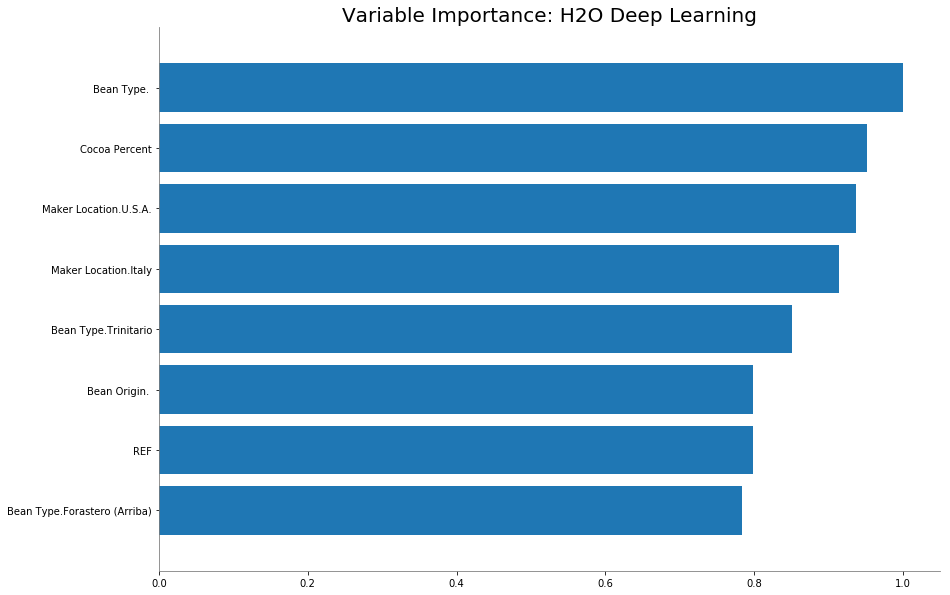

In [80]:
m_DLR_def_python.varimp_plot(8)

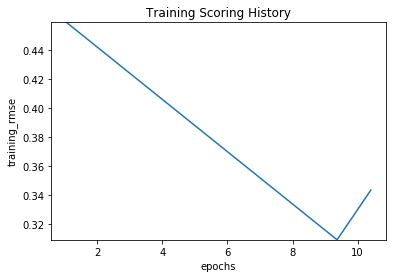

In [81]:
m_DLR_def_python.plot()

In [82]:
m_DLR_def_python

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DLR_baseline


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.11792719229375499
RMSE: 0.3434052886805254
MAE: 0.2759459105432486
RMSLE: 0.08435300474609307
Mean Residual Deviance: 0.11792719229375499

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.20715737097122208
RMSE: 0.4551454393611146
MAE: 0.3665543433352472
RMSLE: 0.11384085868032837
Mean Residual Deviance: 0.20715737097122208
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.3677357,0.0218808,0.3386762,0.4100296,0.3552656,0.335741,0.3989659
mean_residual_deviance,0.2079822,0.0175937,0.1892970,0.2449217,0.2016481,0.1768173,0.2272268
mse,0.2079822,0.0175937,0.1892970,0.2449217,0.2016481,0.1768173,0.2272268
r2,0.0850464,0.0718138,0.2438650,-0.0504393,0.0950309,0.1289590,0.0078162
residual_deviance,0.2079822,0.0175937,0.1892970,0.2449217,0.2016481,0.1768173,0.2272268
rmse,0.4552421,0.0191940,0.4350828,0.4948957,0.4490524,0.4204965,0.4766831
rmsle,0.1138953,0.0036091,0.1131332,0.1187166,0.1124003,0.1055102,0.1197165


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
,2019-02-25 16:55:14,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2019-02-25 16:55:16,51.567 sec,1182 obs/sec,1.0573427,1,1512.0,0.4589685,0.2106520,0.3630246,0.0783323
,2019-02-25 16:55:22,58.044 sec,1877 obs/sec,9.3685315,9,13397.0,0.3092080,0.0956096,0.2413979,0.5816785
,2019-02-25 16:55:24,59.577 sec,1874 obs/sec,10.4041958,10,14878.0,0.3434053,0.1179272,0.2759459,0.4840321


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Bean Type.,1.0,1.0,0.0010416
Cocoa Percent,0.9512376,0.9512376,0.0009908
Maker Location.U.S.A.,0.9370083,0.9370083,0.0009759
Maker Location.Italy,0.9141206,0.9141206,0.0009521
Bean Type.Trinitario,0.8509611,0.8509611,0.0008863
---,---,---,---
"Origin.Paramaribo, batch 20160043-01",0.4906867,0.4906867,0.0005111
Origin.Finisterra,0.4883274,0.4883274,0.0005086
Origin.missing(NA),0.0,0.0,0.0
Maker.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [91]:
# DL hyperparameters
activation_opt = ["Rectifier", "RectifierWithDropout", "Maxout", "MaxoutWithDropout"]
l1_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l2_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
dl_params = {'activation': activation_opt, 'l1': l1_opt, 'l2': l2_opt}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete','seed': 1}

In [92]:
dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator,
                        grid_id='dl_grid1',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)

dl_grid.train(x=xRegress, y=y,
              training_frame=train, 
              hidden=[10,10],
              hyper_params=dl_params,
              search_criteria=search_criteria)

dl_gridperf = dl_grid.get_grid(sort_by='auc', decreasing=True)

H2OResponseError: Server error water.exceptions.H2OIllegalArgumentException:
  Error: Can't parse the search_criteria dictionary; got error: java.lang.IllegalStateException: Expected BEGIN_ARRAY but was BEGIN_OBJECT at line 1 column 3 path $[0] for raw value: [{'key': "strategy", 'value': RandomDiscrete},{'key': "seed", 'value': 1}]
  Request: POST /99/Grid/deeplearning
    data: {'search_criteria': '[{\'key\': "strategy", \'value\': RandomDiscrete},{\'key\': "seed", \'value\': 1}]', 'hyper_parameters': "{'activation': ['Rectifier', 'RectifierWithDropout', 'Maxout', 'MaxoutWithDropout'], 'l1': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1], 'l2': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1]}", 'hidden': '[10,10]', 'hyper_params': '[{\'key\': "activation", \'value\': [\'Rectifier\', \'RectifierWithDropout\', \'Maxout\', \'MaxoutWithDropout\']},{\'key\': "l1", \'value\': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1]},{\'key\': "l2", \'value\': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1]}]', 'training_frame': 'py_18_sid_bc16', 'response_column': 'Rating', 'grid_id': 'dl_grid1'}
